In [1]:
import pandas as pd


In [29]:
import os


folder_path = r"C:\Users\Desktop\Credit card data"


files_in_folder = os.listdir(folder_path)


print(files_in_folder)


['CC GENERAL.csv', 'desktop.ini']


In [31]:
file_path = r"C:\Users\Desktop\Credit card data\CC GENERAL.csv"


In [35]:
data = pd.read_csv(file_path)


In [37]:
print(data.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [39]:
print(data.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [41]:
print(data.describe())


            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [45]:
# Select numerical columns from the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for the numerical columns
from scipy.stats import zscore

z_scores = zscore(data[numerical_columns])

# Identify outliers (e.g., Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Print the outliers
print(outliers)


      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       False              False      False             False   
1       False              False      False             False   
2       False              False      False             False   
3       False              False      False             False   
4       False              False      False             False   
...       ...                ...        ...               ...   
8945    False              False      False             False   
8946    False              False      False             False   
8947    False              False      False             False   
8948    False              False      False             False   
8949    False              False      False             False   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      False         False                False   
1                      False         False                False   
2                 

In [47]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


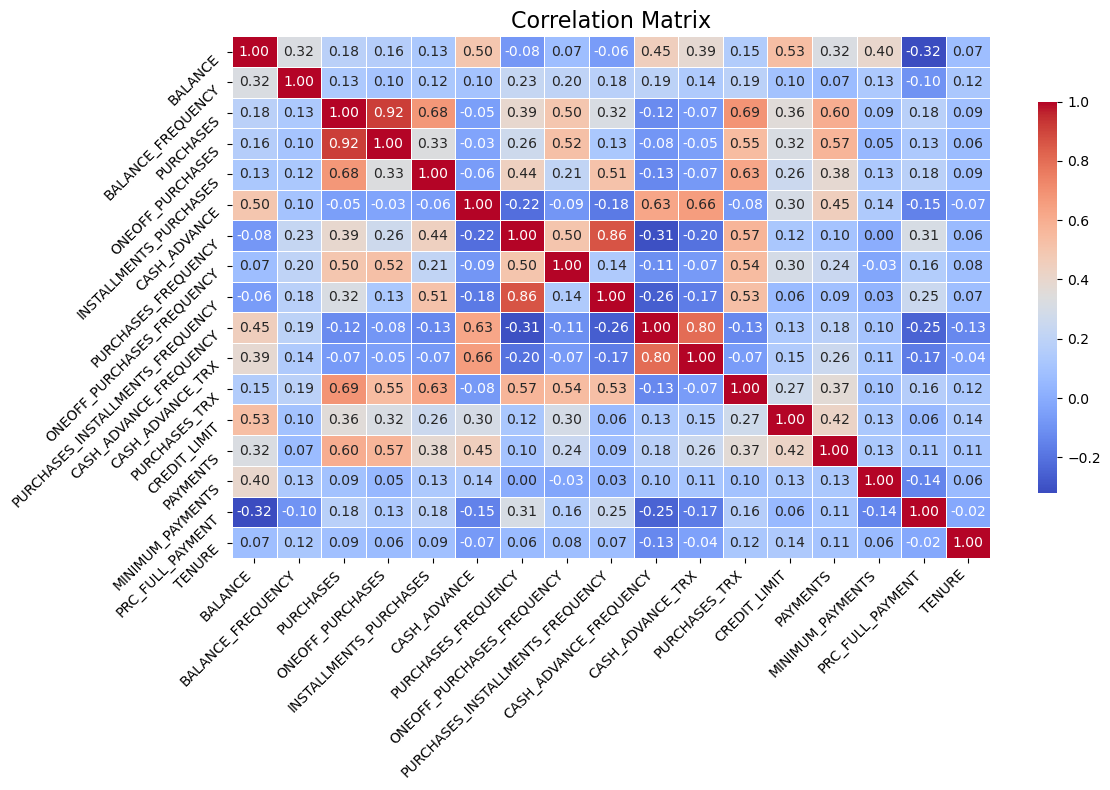

In [55]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from the data
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the heatmap with improved readability
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})

# Rotate the tick labels for better clarity
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Add a title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.tight_layout()  # This ensures labels don't get cut off
plt.show()


In [57]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_features])


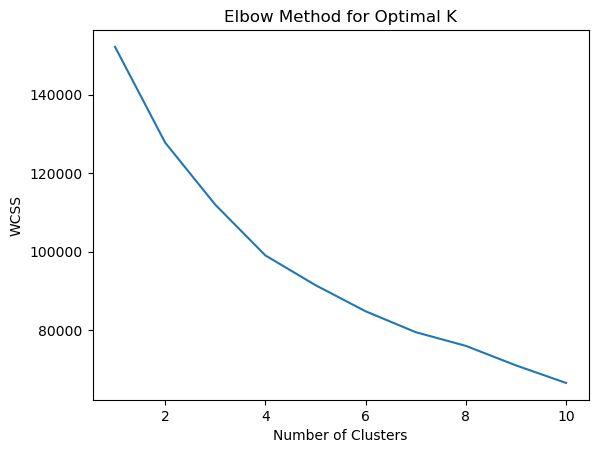

In [61]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data[numerical_columns]), columns=numerical_columns)

# Proceed with scaling and clustering
data_scaled = scaler.fit_transform(data_imputed)

# Perform KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [67]:
# Assuming 'Cluster' column is already added to the data
# Step 1: Filter the data to only include numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 2: Add 'Cluster' column to the numeric data
numeric_data['Cluster'] = data['Cluster']

# Step 3: Group by 'Cluster' and calculate the mean
cluster_summary = numeric_data.groupby('Cluster').mean()

# Step 4: Print the cluster summary
print(cluster_summary)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Scale the data (excluding the 'Cluster' column)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Step 2: Apply KMeans clustering (assuming you have determined the optimal number of clusters)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Step 3: Filter to only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 4: Add 'Cluster' column to the numeric data
numeric_data['Cluster'] = data['Cluster']

# Step 5: Group by Cluster and calculate the mean
cluster_summary = numeric_data.groupby('Cluster').mean()

# Step 6: Print the cluster summary
print(cluster_summary)


          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0        1.770459           0.325991   0.023826          0.032864   
1       -0.702150          -2.161621  -0.311119         -0.235902   
2       -0.384782           0.329253  -0.031279         -0.243000   
3        1.391432           0.405548  -0.299621         -0.216759   
4        1.923051           0.337717  11.212042         10.600367   
5       -0.181775           0.390211   0.463804          0.602612   
6        1.180370           0.465753  -0.056179         -0.284877   
7       -0.104525           0.395508  -0.353831         -0.239907   
8        0.877966           0.468776   2.294398          1.792207   
9       -0.345691          -0.351380  -0.291013         -0.218503   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     -0.004360

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

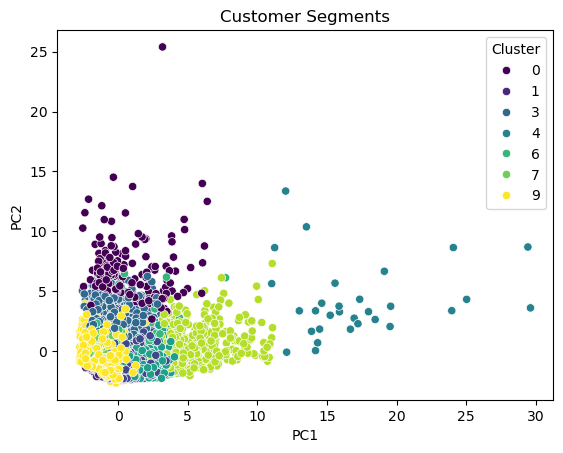

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[numerical_columns])

# Perform PCA on the imputed data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_imputed)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA dataframe
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments')
plt.show()
